## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Описание данных**

Таблица **mkrf_movies** содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
- **title** — название фильма;
- **puNumber** — номер прокатного удостоверения;
- **show_start_date** — дата премьеры фильма;
- **type** — тип фильма;
- **film_studio** — студия-производитель;
- **production_country** — страна-производитель;
- **director** — режиссёр;
- **producer** — продюсер;
- **age_restriction** — возрастная категория;
- **refundable_support** — объём возвратных средств государственной поддержки;
- **nonrefundable_support** — объём невозвратных средств государственной поддержки;
- **financing_source** — источник государственного финансирования;
- **budget** — общий бюджет фильма;
- **ratings** — рейтинг фильма на КиноПоиске;
- **genres** — жанр фильма.

Cтолбец **budget** уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица **mkrf_shows** содержит сведения о показах фильмов в российских кинотеатрах.
- **puNumber** — номер прокатного удостоверения;
- **box_office** — сборы в рублях.

**Цель работы** -  изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. 

**План работы**
1. Открыть и объединить данные в один датафрейм:
   - mkrf_movies — данные о прокатных удостоверениях;
   - mkrf_shows  — данные о прокате в российских кинотеатрах.
3. Предобработка данных:
   - Проверить типы данных в датафрейме и преобразовать там, где это необходимо;
   - Изучить пропуски в датафрейме;
   - Проверить, есть ли в данных дубликаты;
   - Изучить и проанализировать столбцы, содержащие категориальные значения;
   - Изучить и проанализировать столбцы, содержащие количественные значения;
   - Добавить новые столбцы:
                              - Создать столбец с информацией о годе проката. Выделите год из даты премьеры фильма;
                              - Создать два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. 
                                В столбцы войдут первые значения из списка режиссёров и жанров соответственно;
                              - Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.
5. Исследовательский анализ данных:
   - Изучить, сколько фильмов выходило в прокат каждый год. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализировать, как эта доля менялась по годам. Сделать вывод о том, какой период полнее всего представлен в данных;
   - Изучить, как менялась динамика проката по годам;
   - Посчитать среднюю и медианную сумму сборов для каждого года. Сравнить значения и сделайте выводы;
   - Определить, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год. Посмотреть фильмы с каким возрастным ограничением собрали больше всего денег в прокате. Менялась ли картина в зависимости от года. Предположить, с чем это может быть связано.
7. Исследование фильмов, получившие государственную поддержку:
   - Посмотреть, сколько выделяют средств на поддержку кино;
   - Проанализировать, хорошо ли окупаются такие фильмы, какой у них рейтинг;
   - Поискать другие закономерности.
9. Общий вывод.

In [1]:
# Импорт библиотек
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Открытие файла с данными и объединение их в один датафрейм. 

In [2]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
movies.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"


In [3]:
#movies.info()

In [4]:
shows = pd.read_csv('/datasets/mkrf_shows.csv')
shows.head(2)

,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0


In [5]:
#shows.info()

In [6]:
shows['puNumber'] = shows['puNumber'].astype(str)
#shows.info() #проверка

In [7]:
data = subscriptions.merge(shows, on='puNumber', how='left') #объединяю таблицы

In [8]:
#data.info() #проверка

### Предобработка данных

#### Анализ типа данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [9]:
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

- столбец **'show_start_date'** преобразую в формат datetime

In [10]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')

- столбец **'ratings'** преобразую в float, а выбивающиеся строки с % переведу в десятичный формат

In [11]:
data['ratings'] = data['ratings'].fillna(0)
data['ratings'] = data['ratings'].astype(str)
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype(float)
#data['ratings'].unique() #проверка

In [12]:
for t in data['ratings']:
    data.loc[(data['ratings'] > 10), 'ratings'] = \
    data.loc[(data['ratings'] > 10), 'ratings']/10

In [13]:
#data.info() #проверка

#### Пропуски в датафрейме

In [14]:
data.isna().sum().sort_values(ascending=False)

refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
box_office               4328
genres                    976
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
puNumber                    0
show_start_date             0
type                        0
age_restriction             0
ratings                     0
dtype: int64

В таблице есть пропуски в столбцах: film_studio, production_country, director, refundable_support, nonrefundable_support, budget, financing_source, genres и box_office 

- столбец **'production_country'**

В столбце 'production_country' всего 2 пропуска, заполню данными из интернета

In [15]:
data[data['production_country'].isna()]

data.loc[3186, 'production_country'] = 'Россия'
data.loc[4441, 'production_country'] = 'Россия'

- столбцы **'refundable_support', 'nonrefundable_support', 'budget', 'financing_source'** 

In [16]:
print('Информация в строках заполнена по всем столбцам:',len(data.query('refundable_support>=0 & nonrefundable_support>=0 & budget>=0')))
print('Информация в строках заполнена по одному из столбцу:',len(data.query('refundable_support>=0 or nonrefundable_support>=0 or budget>=0')))

Информация в строках заполнена по всем столбцам: 332
Информация в строках заполнена по одному из столбцу: 332


In [17]:
support = data[~data['refundable_support'].isna()].copy()
support['production_country'] = support['production_country'].dropna().apply(lambda x: x.split(',')[0])
print('Количество фильмов с господдержкой:',len(support))
print('Количество иностранных фильмов с господдержкой:',len(support.query('production_country != "Россия"')))
not_support = data[data['refundable_support'].isna()].copy()
not_support['production_country'] = not_support['production_country'].dropna().apply(lambda x: x.split(',')[0])
print('Количество фильмов из России без господдержки:',len((not_support.query('production_country == "Россия"'))))
print('Доля фильмов с господдержкой среди российских фильмов', len(support)/(len(support)+len((not_support.query('production_country == "Россия"')))))

Количество фильмов с господдержкой: 332
Количество иностранных фильмов с господдержкой: 4
Количество фильмов из России без господдержки: 1533
Доля фильмов с господдержкой среди российских фильмов 0.1780160857908847


- Господдержка оказывалась только для фильмов, для которых Россия является основной страной-производителем. 
- Только для 17% российских фильмов из данных оказывалась господдержка
- Для всех фильмов с господдержкой заполнены столбцы 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source' (т.е. содержимое не NaN)

- столбцы **'director', 'producer' и 'film_studio', 'genres'**

In [18]:
#data[data['director'].isna()]
#data.query('film_studio == "Райзинг Алтернатив" or producer == "Вальдбюне Театр"')
#data.query('film_studio == "МортуСкрин" or film_studio == "Британский музей" or film_studio == "МортуСкрин, Британский музей" or producer == "Британский музей"')
#data.query('film_studio == "Эншутц Интертейнмент Груп" or producer == "Эншутц Интертейнмент Груп"')
#data.query('film_studio == "Опус Арт" or producer == "Короевский колледж Кембриджа"')
#data.query('film_studio == "Омниверс Визион" or producer == "Омниверс Визион"')

In [19]:
film_studio = data.loc[data.duplicated(subset=['film_studio'], keep=False).any(level=0)].sort_values(by='film_studio')
film_studio = film_studio.loc[~data.duplicated(subset=['director','producer'], keep=False).any(level=0)].sort_values(by='film_studio')
print(len(film_studio))
film_studio.head(5)

1047


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1986,Ёлки 1914,111023014,2014-12-10 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,"Т.Бекмамбетов, О.Харина, Ю.Быков, Д.Киселев, А...","Т.Бекмамбетов, С.Агеев",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.7,"семейный,комедия,драма",425970499.0
1987,Елки Лохматые,111023114,2014-12-10 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26000000.0,30000000.0,80000000.0,Фонд кино,5.0,"семейный,комедия",121225633.8
4529,Ёлки,111010710,2010-12-08 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,"Т.Бекмамбетов, Я.Чеважевский, А.Войтинский, Д....","С.Муазен, А.Ремизова",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.9,комедия,125.0
6209,Похищенные сокровища Европы,126001518,2018-09-06 12:00:00,Прочие,"3D Продуциони, Нексо Диджитал","Италия, Франция, Германия",Клаудио Поли,Вероника Ботанелли,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,0.0,NaN,NaN
6866,Гоген: В поисках утраченного рая,126001019,2019-04-16 12:00:00,Прочие,"3D Продуциони, Нексо Диджитал",Италия,Клаудио Поли,"Франко Ди Сарро, Диди Ньокки",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,0.0,NaN,380009.0


Я предположила, что такие данные как: director, producer и film_studio могут быть взаимосвязанны. 
Я предварительно рассмотрела пропуски в столбце director (так как их всего 9) - и профильтровала каждую строку с пропуском по совпадению с идентичными значениями film_studio или producer в других строках таблицы. 
По итогу, в одной студии фильма могут быть разные режиссеры и продюсеры (и жанры тоже разные)

Затем еще раз проверила поставив фильтр на одинаковые значения в film_studio, но разные значения в 'director','producer'' и удостоверилась в отсутствие взаимосвязи

- столбец **'box_office'**

Столбец 'box_office' скорее всего заполнен лишь теми фильмами, для которых уже посчитаны сборы 

#### Дубликаты в датафрейме

In [20]:
data.duplicated().sum() # подсчёт количества дубликатов

0

In [21]:
data.nunique() # количество всех уникальных значений в dataframe

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    85
genres                    742
box_office               2938
dtype: int64

- Столбец **'title'**

In [22]:
data.loc[data['title'].duplicated(keep=False)].sort_values(by='title').head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN


In [23]:
title = data.loc[data.duplicated(subset=['title'], keep=False).any(level=0)].sort_values(by='title')
title = title.loc[~data.duplicated(subset=['genres', 'director'], keep=False).any(level=0)].sort_values(by='title')
title.head(4)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6674,Большая игра,111001819,2019-02-28 12:00:00,Художественный,"ООО ""ГГФ"" по заказу АО ""Сеть телевизионных ста...",Россия,Б.Батуллин,А.Марченко,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,криминал,биография",NaN
5671,Большая игра,121027917,2018-01-11 12:00:00,Художественный,"Интертейнмент Уан, Паскаль Пикчерз, Марк Гордо...",США,Аарон Соркин,"Марк Гордон, Эми Паскаль",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.6,"драма,криминал,биография",77806917.35
3394,В тихом омуте,121018516,2016-06-21 12:00:00,Художественный,"Зэ Бэ Продуцион, Твенти Твенти Вижн Филмпродуц...",Германия - Франция,Брюно Дюмон,"Жан Бреа, Рашид Бушареб, Мюриэль Мерлин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",2883624.01
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


Повторы в столбце title существуют по 2 причинам:
- разные запуски одного и того же фильма
- разные фильмы с одним и тем же названием

- Столбец **'puNumber'**

Номер прокатного удостоверения - это документ, дающий право на прокат (демонстрацию) фильма на территории Российской Федерации, а также на его тиражирование и распространение, в том числе по кабельным или эфирным каналам.

Вероятно, идентичность номера для трех разных фильмов - опечатка. Так как данный столбец не имеет практической пользы для анализа - оставлю как есть

In [24]:
#data.loc[data['puNumber'].duplicated(keep=False)].sort_values(by='puNumber').head()

- Столбец **'show_start_date'**

Очевидно, что разные фильмы могут выходить на экран в один и тот же день.

In [25]:
data.loc[data['show_start_date'].duplicated(keep=False)].sort_values(by='show_start_date').head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4332,Вечный зов.,213000210,2010-01-13 12:00:00,Художественный,"ОАО ""Леннаучфильм""",Россия,"В.Ефремов, И.Ефремова, В.Лопач",В.Бажин,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.3,драма,NaN
4466,Последний король Шотландии,221002410,2010-01-13 12:00:00,Художественный,"Дэ Эн А Филмз, Фокс Серчлайт Пикчерз, Филм Фо,...",Великобритания - США,Кевин МакДональд,"Лиза Брайер, Андреа Колдервуд, Кристин Рупперт...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,драма,биография",NaN


- Столбец **'type'** 

In [26]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [27]:
data['type'] = data['type'].str.strip() 
#data['type'].unique() #проверка

Есть несколько значений, у которых появился пробел в начале строки

- Столбец **'film_studio'**

In [28]:
print(len(data['film_studio'].unique()))

data['film_studio'] = data['film_studio'].str.strip() 
print(len(data['film_studio'].unique()))

list = ['-',' -','- ',' - ',', ',' ,']

for i in list:
    data['film_studio'] =  data['film_studio'].str.replace(i, ',')

print(len(data['film_studio'].unique()))

5491
5463
5460


Есть несколько значений, у которых есть пробелы в начале и конце строки, а также лишние пробелы при перечисление 

- Столбец **'production_country'**

In [29]:
data['production_country'] = data['production_country'].str.strip()

list = ['-',' -','- ',' - ',', ',' ,']
for i in list:
    data['production_country'] =  data['production_country'].str.replace(i, ',')
    
data['production_country'] =  data['production_country'].str.replace('Бразилия,Германия,Порртугалия,Франция', 'Бразилия,Германия,Португалия,Франция')
data['production_country'] =  data['production_country'].str.replace('Бразилия,К;анада', 'Бразилия,Канада')
#sorted(data['production_country'].unique()) 

В этом столбце большое количество неявных дубликатов, от некоторых из них я избавилась. Дубликаты появились скорее всего из-за ручного ввода данных в данном столбце

- Столбец **'director'**

In [30]:
print(len(data['director'].unique()))

data['director'] = data['director'].str.strip() 
print(len(data['director'].unique()))

list = ['-',' -','- ',' - ',', ',' ,']

for i in list:
    data['director'] =  data['director'].str.replace(i, ',')
    
print(len(data['director'].unique()))

4812
4802
4802


Есть несколько значений, у которых есть пробелы в начале и конце строки

- Столбец **'producer'**


In [31]:
print(len(data['producer'].unique()))

data['producer'] = data['producer'].str.strip()
print(len(data['producer'].unique()))

list = ['-',' -','- ',' - ',', ',' ,']

for i in list:
    data['producer'] =  data['producer'].str.replace(i, ',')
    
print(len(data['producer'].unique()))

5350
5335
5335


Есть несколько значений, у которых есть пробелы в начале и конце строки

- Столбец **'age_restriction'**

In [32]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Повторы отсутствуют

- Столбец **'genres'**

In [33]:
print(len(data['genres'].unique()))
data['genres'] = data['genres'].str.strip() 
print(len(data['genres'].unique()))
list = ['-',' -','- ',' - ',', ',' ,']
for i in list:
    data['genres'] =  data['genres'].str.replace(i, ',')
print(len(data['genres'].unique()))

743
743
743


Повторы отсутствуют

#### Анализ категориальных значений

Категориальные данные это столбцы:  title, show_start_date, type, film_studio, production_country, age_restriction, genres, director, producer.

- В столбце title есть две категории повторов: разные запуски одного и того же фильма и разные фильмы с одним и тем же названием
- В столбце 'puNumber' есть повторы-опечатки: идентичность номера для трех разных фильмов
- Для столбцов title, type, 'film_studio', 'production_country', 'director', 'producer' - основная ошибка - это пробелы в начале или в конце строки, а также лишние пробелы при перечисление. В стобце production_country я выявила очевидные опечатки при просмотре уникальных значений (например, "К;анада"), также избавилась от разделителей-дефисов, заменяющих в некоторых строках запятые.
- Есть пропуски в столбцах: film_studio, production_country, director, genres, но взаимосвязь для заполнения пропусков отсутствует. 

#### Анализ количественных значений

- Есть строки, в которых обозначенно оказание господдержки, но общий бюджет равен нулю, заменю их медианными значениями доли общей суммы поддержки от общего бюджета фильма

In [34]:
budget0 = data.query('(refundable_support != 0 or refundable_support !=0) and budget == 0')
budget0.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"",ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"",ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"",ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"",ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук,Т.Вайнштейн,Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3675,Чудо-юдо,114001817,2017-06-27 12:00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",«6+» - для детей старше 6 лет,20000000.0,20000000.0,0.0,Фонд кино,5.2,"мультфильм,фэнтези,семейный",5.510801e+07


In [35]:
budget_norm = data.query('(refundable_support != 0 or nonrefundable_support !=0) and budget > 0').copy()
#budget_norm = budget_norm['refundable_support','nonrefundable_support','budget']

budget_norm['support'] = budget_norm['refundable_support'] + budget_norm['nonrefundable_support']

In [36]:
budget_norm['support_per'] = budget_norm['support']/budget_norm['budget']
support_per = budget_norm['support_per'].median()

data.loc[budget_norm.index, 'budget'] = (data.loc[budget_norm.index, 'refundable_support'] + data.loc[budget_norm.index, 'nonrefundable_support'])/(support_per)

**Количественные данные это столбцы:**  trefundable_support, nonrefundable_support, budget, financing_source, ratings, box_office.

- Господдержка оказывалась только для фильмов, для которых Россия является основной страной-производителем. 
- Только для 17% российских фильмов из данных оказывалась господдержка
- Для всех фильмов с господдержкой заполнены столбцы 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source' (т.е. содержимое не NaN), но при это есть строки, в которых обозначенно оказание господдержки, но общий бюджет равен нулю, заменила их медианными значениями доли общей суммы поддержки от общего бюджета фильма.
- В столбце 'box_office' также есть пропуски, скорее всего столбец заполнен лишь теми фильмами, для которых уже посчитаны сборы.

#### Добавление новых столбцов

- Создание столбца с информацией о годе проката

In [38]:
data['year'] = data['show_start_date'].dt.year
data[['year', 'show_start_date']].head() #проверка

,year,show_start_date
0,2015,2015-11-27 12:00:00
1,2016,2016-09-13 12:00:00
2,2016,2016-10-10 12:00:00
3,2016,2016-06-10 12:00:00
4,2015,2015-07-29 12:00:00


- Создание столбцов с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [39]:
def full_name(data, columns):
    try:
        for column in columns:
            data[f'base_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
        return data
    except:
        pass

In [40]:
data = full_name(data, ['director', 'genres'])
#data.info() #проверка

In [41]:
data[['genres', 'base_genres', 'director','base_director']].head() #проверка

,genres,base_genres,director,base_director
0,"боевик,драма,мелодрама",боевик,Кевин Костнер,Кевин Костнер
1,"драма,военный",драма,Е.Матвеев,Е.Матвеев
2,"фантастика,боевик,триллер",фантастика,Тимур Бекмамбетов,Тимур Бекмамбетов
3,"фантастика,боевик,триллер",фантастика,Тимур Бекмамбетов,Тимур Бекмамбетов
4,"фантастика,боевик,триллер",фантастика,Тимур Бекмамбетов,Тимур Бекмамбетов


- Рассчет доли от общего бюджета фильма составляемый государственной поддержкой.

In [42]:
support_per # см.п. 1.2.5.

0.5922645480995804

#### Вывод

1. **Категориальные данные это столбцы:**  title, show_start_date, type, film_studio, production_country, age_restriction, genres, director, producer.

- В столбце title есть две категории повторов: разные запуски одного и того же фильма и разные фильмы с одним и тем же названием
- В столбце 'puNumber' есть повторы-опечатки: идентичность номера для трех разных фильмов
- Для столбцов title, type, 'film_studio', 'production_country', 'director', 'producer' - jсновная ошибка - это пробелы в начале или в конце строки, а также лишние пробелы при перечисление. В стобце production_country я выявила очевидные опечатки при просмотре уникальных значений (например, "К;анада"), также избавилась от разделителей-дефисов, заменяющих в некоторых строках запятые.
- Есть пропуски в столбцах: film_studio, production_country, director, genres, но взаимосвязь для заполнения пропусков отсутствует. 

2. **Количественные данные это столбцы:**  trefundable_support, nonrefundable_support, budget, financing_source, ratings, box_office.

- Господдержка оказывалась только для фильмов, для которых Россия является основной страной-производителем. 
- Только для **17%** российских фильмов из данных оказывалась господдержка
- Для всех фильмов с господдержкой заполнены столбцы 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source' (т.е. содержимое не NaN), но при это есть строки, в которых обозначенно оказание господдержки, но общий бюджет равен нулю, заменила их медианными значениями доли общей суммы поддержки от общего бюджета фильма.
- В столбце 'box_office' также есть пропуски, скорее всего столбец заполнен лишь теми фильмами, для которых уже посчитаны сборы.
- Доля от общего бюджета фильма составляемый государственной поддержкой: **0,59**


3. - Добавлены столбцы с информацией о годе проката. Также столбцы с именем и фамилией главного режиссёра и с основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно.

### Исследовательский анализ данных


- Исследование количества фильмов выходящих в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Посчитана доля фильмов с указанной информацией о прокате в кинотеатрах.

In [43]:
print('Доля фильмов с указанной информацией о прокате в кинотеатрах:', data.box_office.notna().mean())

Доля фильмов с указанной информацией о прокате в кинотеатрах: 0.42185412770504943


In [44]:
release = data.query('box_office > 0')['year'].value_counts().sort_index()
not_release =data.loc[~(data['box_office'] > 0)]['year'].value_counts().sort_index()

box = pd.concat([release, not_release], axis=1)
box.columns = ['release', 'not_release']
not_release = data.loc[~(data['box_office'] > 0)]['year'].value_counts().sort_index()
box['share_release'] = box['release']/(box['not_release']+box['release'])*100
box

,release,not_release,share_release
2010,101,884,10.253807
2011,109,513,17.524116
2012,123,470,20.741990
2013,179,451,28.412698
2014,273,534,33.828996
2015,462,243,65.531915
2016,525,293,64.180929
2017,357,148,70.693069
2018,475,416,53.310887
2019,530,400,56.989247


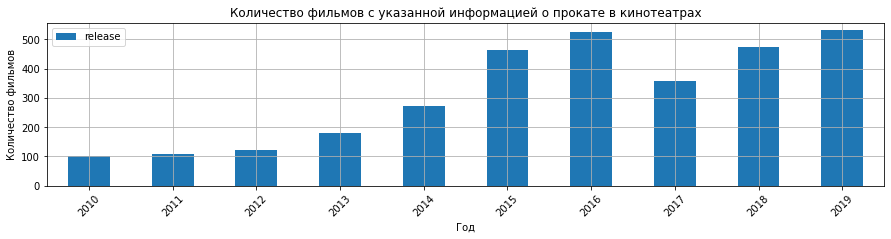

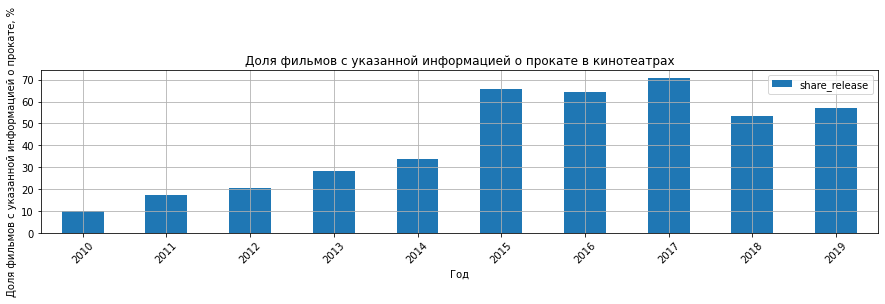

In [46]:
box.plot(title='Количество фильмов с указанной информацией о прокате в кинотеатрах',kind='bar',stacked=True,y=['release'],figsize=(15,3))
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.grid()
plt.xticks(rotation=45)
plt.show()

box.plot(title='Доля фильмов с указанной информацией о прокате в кинотеатрах',kind='bar',stacked=True,y=['share_release'],figsize=(15,3))
plt.xlabel('Год')
plt.ylabel('Доля фильмов с указанной информацией о прокате, %')
plt.grid()
plt.xticks(rotation=45)
plt.show()

На период с 2010-2019гг:
- минимальное количество фильмов в прокате было в 2010г (101), затем с каждым годом количество релизов увеличивалось вплоть до 2016 года (свыше 500)- резкий спад в 2017г (около 350) и в 2019 году показатели смогли немного превысить пик 2016 года.
- минимальная доля фильмов в прокате также была в 2010г (10%), затем линейно росла до 2014года включительно. Резкий скачок в 2015 году(65.5%), неюольшой спад в 2016г (64%) и затем в 2017 достиг максимального значения (70,7%). В 2018 и 2019 показатели снова немного опустились - 53,3% и 57% соответсвенно.

**Вывод:**

- В период с 2010-2014гг большая часть фильмов из реестра так и не выходили в прокат, хотя с годами показатели немного и поднимались (в прокате 10.2-33,8%). 
- С 2015-2017г ситуация резко улучшилась и свыше 64% фильмов, получившие прокатное удостоверение, смогли выйти в прокат. Лучшие показатели за все время - это 2017год: при относительно малом количестве фильмов в реестре 70.7% в прокате.
- В период за 2018 и 2019 год показатели несколько ухудщились: количество фильмов в реестре по численности примерно равно показателям 2015 и 2016 года, но вышли в прокат всего 53.3% и 57% фильмов соответственно - чуть больше половины. 

In [48]:
box_office = data.query('box_office > 0')
box_office_sum = pd.pivot_table(
    data=box_office,
    index='year',
    values='box_office',
    aggfunc={'sum','median','mean'}).copy()
box_office_sum

,mean,median,sum
year,,,
2010,2.404608e+04,1710.000,2.428654e+06
2011,1.293832e+05,3000.000,1.410276e+07
2012,5.654815e+04,6220.000,6.955423e+06
2013,1.664788e+05,3580.000,2.979971e+07
2014,2.727089e+07,20400.000,7.444952e+09
2015,8.549213e+07,5003450.150,3.949737e+10
2016,9.117390e+07,3915041.020,4.786630e+10
2017,1.360328e+08,9968340.000,4.856371e+10
2018,1.045651e+08,8891102.210,4.966840e+10


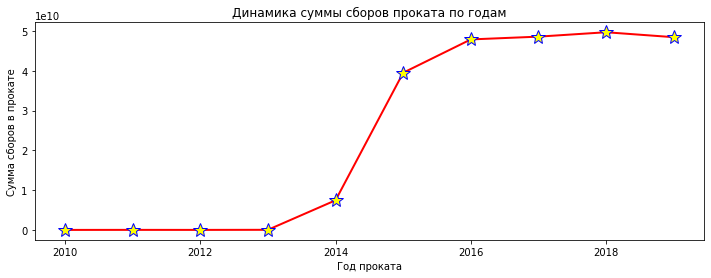

In [49]:
plt.figure(figsize=(12, 4))
plt.plot(box_office_sum.index, box_office_sum['sum'], color = 'red', linewidth = 2, marker='*', markersize=15, markerfacecolor='yellow', markeredgecolor='blue')
plt.xlabel('Год проката')
plt.ylabel('Сумма сборов в прокате')
plt.title('Динамика суммы сборов проката по годам');
plt.show()
pass

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

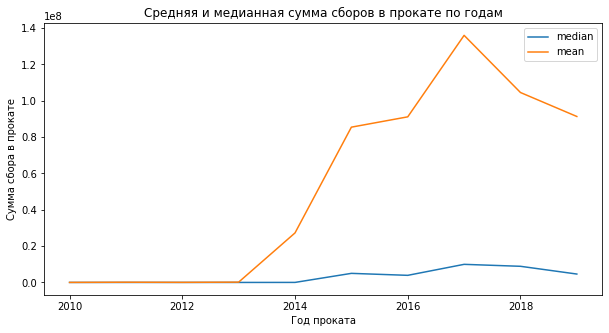

In [50]:
box_office_sum.plot(title='Cредняя и медианная сумма сборов в прокате по годам', y=['median', 'mean'], figsize=(10,5))
plt.xlabel('Год проката')
plt.ylabel('Сумма сбора в прокате')
plt.show()
pass

 - По данным графиков 'Динамика суммы сборов проката по годам' и 'Cредняя и медианная сумма сборов в прокате по годам' можно сказать, что общая сумма сборов была на стабильных показателях до 2013 года: затем начался резкий прирост. По разнице медианных и средних значений видно, что сумма сборов в разы увеличилась лишь для небольшого количества фильмов, в то время как большинство выходящих в прокат имели минимальный прирост. Пик сборов самых собираемых фильмов - это 2017 год, в 2020 году - сравнялись с данными 2015 года. Из-за большой разницы между медианными и средними значениями, можно сказать, что общая сумма сборов в прокате стабильна с 2016 года. 

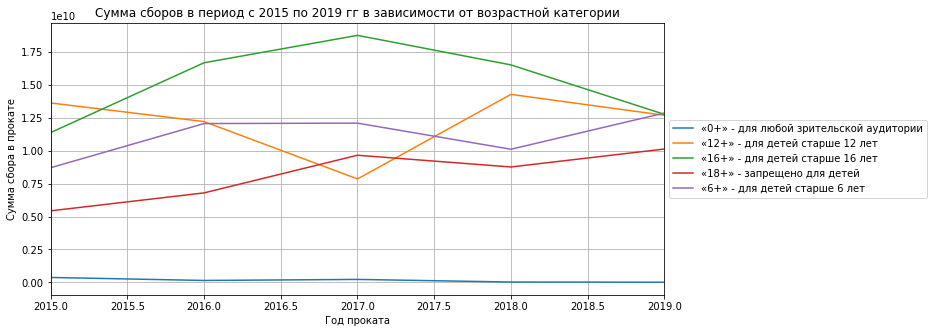

In [51]:
box_office.pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum').plot(title='Сумма сборов в период с 2015 по 2019 гг в зависимости от возрастной категории', kind='line', xlim=[2015, 2019], figsize=(11,5),)
plt.xlabel('Год проката')
plt.ylabel('Сумма сбора в прокате')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

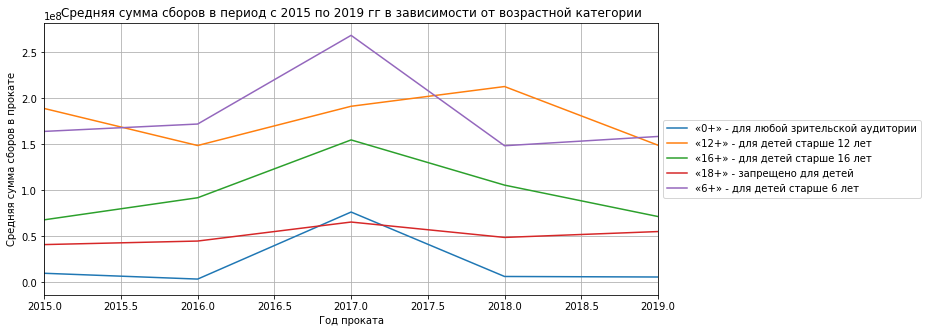

In [52]:
box_office.pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='mean').plot(title='Cредняя сумма сборов в период с 2015 по 2019 гг в зависимости от возрастной категории', kind='line', xlim=[2015, 2019], figsize=(11,5),)
plt.xlabel('Год проката')
plt.ylabel('Средняя сумма сборов в прокате')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

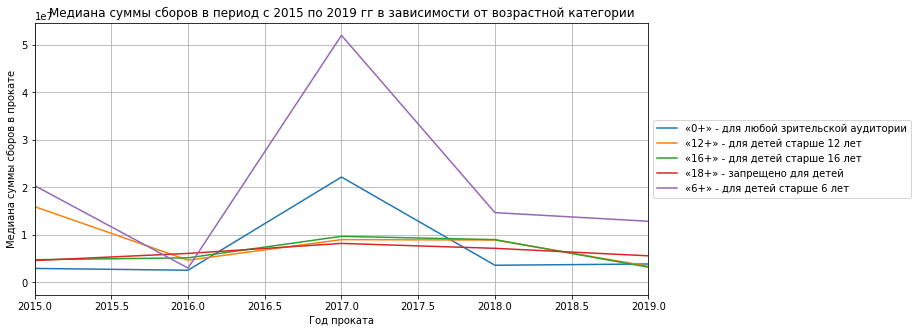

In [53]:
box_office.pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc={'box_office': np.median}).plot(title='Медиана суммы сборов в период с 2015 по 2019 гг в зависимости от возрастной категории', kind='line', xlim=[2015, 2019], figsize=(11,5),)
plt.xlabel('Год проката')
plt.ylabel('Медиана суммы сборов в прокате')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

#### Вывод

 - Для категории "0+" в период за 2015-2019 гг сумма сборов стабильно приближенна к нулю. В 2017 году резкое увеличилось среднее и особенно медианное значение суммы сборов данной категории "0+", что говорит о том, что количество фильмов за этот период уменьшлось, но они дали значительный прирост суммы сборов, хоть и не повлияли на общегодовые показатели. Можно предположить. что в независимости от того, сколько в кинотеатрах фильмов данной категории - на них придет, в общей сумме, примерно одно и то же количество людей.
 - Для категории "6+" сумма сборов за период за 2015-2019 гг с малым увеличением колеблится на отметках примерно 8,75млрд- 12.5млрд. При этом, в 2016г сумма сборов увеличилась примерно на 3,7млрд, немного выросло среднее значение (в пределах 10млн) и резко упала медиана сборов: примерно на 17млн, что говорит о том, что на конечную сумму сборов повлияло как увеличение количества фильмов данной категории, так и повышение средней суммы сборов для некоторых фильмов. В 2017 г динамика схожа с категорией "0+" для того же года: количество фильмов за этот период уменьшлось, но они дали значительный прирост суммы сборов, хоть и не повлияли на общегодовые показатели. В 2018 г средняя сумма сборов уменьшилась и медианные показатели тоже, из чего можно предположить, что на понижение общей сумму сборов по большей части влияют именно средние показатели. 
 - Категория "16+" за 4 года собрала больше всего денег в прокате. 
 - В 2017 году был резкое увеличение сборов для категории "16+" и практически зеркальный спад для "12+" в 2016-2017гг, из-за чего сборы были ниже трех остальных основных категорий. Вероятно, это связано с большим количеством качественных популярных фильмов снятых в 2017г для категории "16+". Люди ходят на ограниченное количество фильмов, резкая популярность фильмов одной категории может сильно повлиять на сборы соседней. И, по итогу, общая сумма сборов в год в среднем не изменится.
 - к 2019 году сумма сборов сравнялись для категорий "6+", "12+" и "16+".
 - Фильмы с категорией "18+" имеет практически линейный рост - за 4 года на 50млн, с небольшим пиковым ростом в 2017 году. 

### Исследование фильмов, получивших государственную поддержку

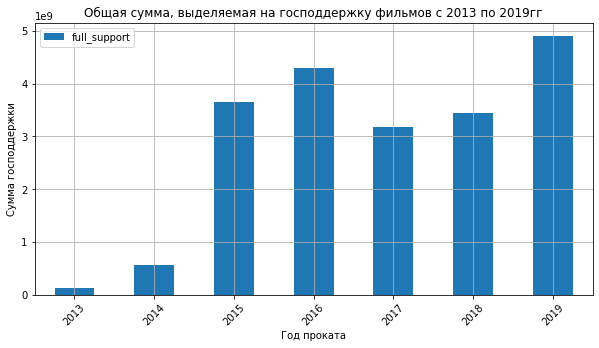

In [54]:
state_support = data.query('refundable_support >=0 & nonrefundable_support>=0').copy()
state_support['full_support'] = data['refundable_support'] + data['nonrefundable_support']

state_support[['full_support', 'year']].groupby('year').agg('sum') .plot(title='Общая сумма, выделяемая на господдержку фильмов с 2013 по 2019гг', kind='bar',figsize=(10,5))
plt.xlabel('Год проката')
plt.ylabel('Сумма господдержки')
plt.grid()
plt.xticks(rotation=45)
plt.show()

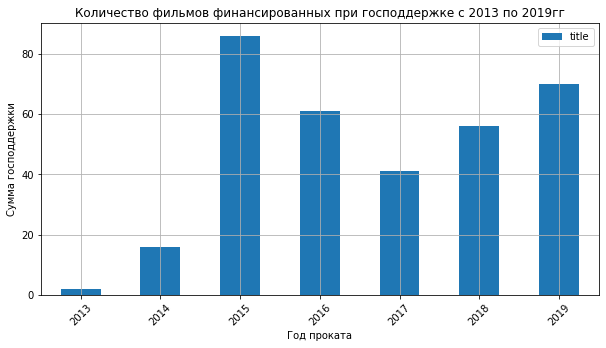

In [55]:
state_support[['title', 'year']].groupby('year').agg('count') .plot(title='Количество фильмов финансированных при господдержке с 2013 по 2019гг', kind='bar',figsize=(10,5))
plt.xlabel('Год проката')
plt.ylabel('Сумма господдержки')
plt.grid()
plt.xticks(rotation=45)
plt.show()

- В период за 2015 и 2016гг наблюдается отрицательная корреляция между такими параметрами как количество профинансированных фильмов и суммарное количество сборов, но с 2017 года показатели улучшились и уже можно заметить стабильную корреляию между этими двумя параметрами, из-за чего можно предположить, что улучшилось качество выбора фильмов для финансирования. 

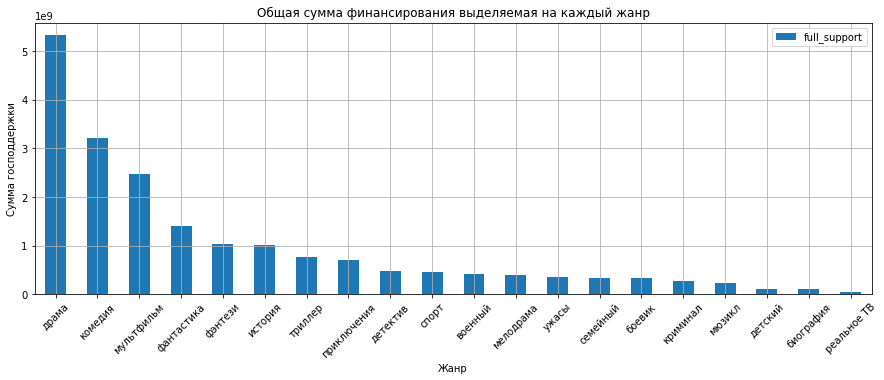

In [56]:
state_support[['full_support', 'base_genres']].groupby('base_genres').agg('sum').sort_values(by='full_support', ascending=False) .plot(title='Общая сумма финансирования выделяемая на каждый жанр', kind='bar',figsize=(15,5))
plt.xlabel('Жанр')
plt.ylabel('Сумма господдержки')
plt.grid()
plt.xticks(rotation=45)
plt.show()

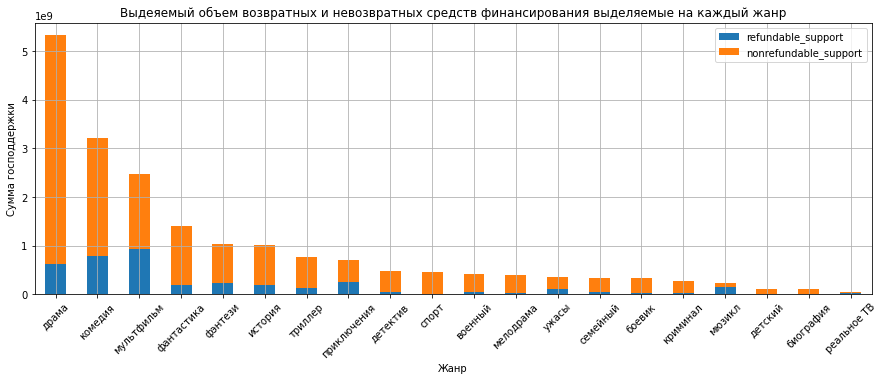

In [57]:
state_support.groupby('base_genres').agg('sum').sort_values(by='full_support',
                         ascending=False).plot(title='Выдеяемый объем возвратных и невозвратных средств финансирования выделяемые на каждый жанр',kind='bar',stacked=True,y=['refundable_support', 'nonrefundable_support'],figsize=(15,5))
plt.xlabel('Жанр')
plt.ylabel('Сумма господдержки')
plt.grid()
plt.xticks(rotation=45)
plt.show()

- Большинство средств, выделяемых государством на поддержку фильмов по всем жанрам - является невозвратным;
- За исключением мюзиклом - на них финансирование, в основном, выделяется из объёма возвратных средств

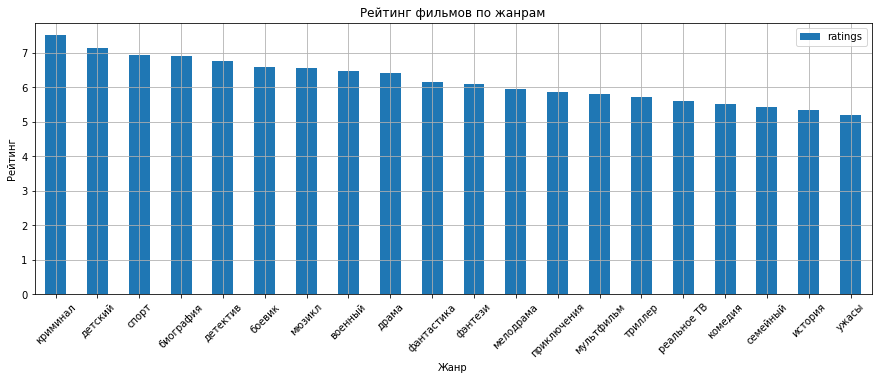

In [58]:
state_support[['base_genres', 'ratings']].groupby('base_genres').agg('mean').sort_values(by='ratings', ascending=False).plot(title='Рейтинг фильмов по жанрам', kind='bar',figsize=(15,5));
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [59]:
state_support['recoupment'] = state_support['box_office'] / state_support['full_support'] - 1
state_support['paid_off'] = state_support['recoupment'] > 0
state_support['not_paid_off'] = ~state_support['paid_off']

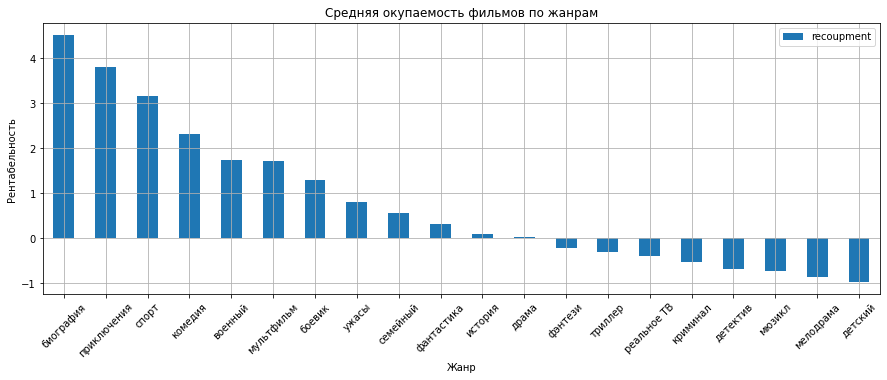

In [60]:
state_support.groupby('base_genres').agg('mean').sort_values(by='recoupment',ascending=False).plot(title='Cредняя окупаемость фильмов по жанрам',kind='bar',figsize=(15,5),stacked=True,
                  y='recoupment')
plt.xlabel('Жанр')
plt.ylabel('Рентабельность')
plt.grid()
plt.xticks(rotation=45)
plt.show()

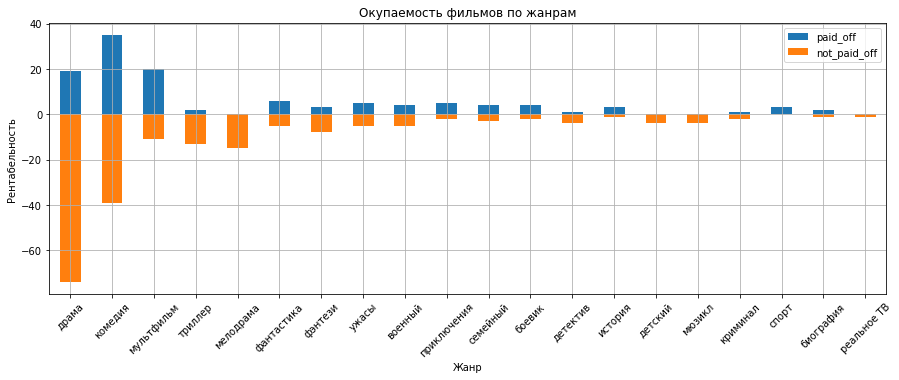

In [61]:
state_support.groupby('base_genres').agg({'title': 'count','paid_off': 'sum','not_paid_off': lambda x: 0 - x.sum()}).sort_values(by='title',ascending=False).plot(title='Окупаемость фильмов по жанрам',kind='bar',figsize=(15,5),stacked=True,
                         y=['paid_off', 'not_paid_off'])
plt.xlabel('Жанр')
plt.ylabel('Рентабельность')
plt.grid()
plt.xticks(rotation=45)
plt.show()

 - Топ-5 жанров, на которые государство выдяет деньги это: драма, комедия, мультфильм, фантастика, фэнтези
 - Топ-5 самых рейтинговых жанров это: криминал, детский, спорт, биография, детектив
 - Топ 5 окупаемых фильмов это: биография, приключения, спорт, комедия, военный
 - Топ-5 не окупаемых фильмов это: драма, комедия, мелодрама, триллер, мультфильм
 
 
 - Такие жанры как: драма, комедия и мульфильмы - являются самыми финансированными, но при этом далеко не самые рейтинговые и окупаемые 
 - Жанры биография и спорт - лучшие для финансирования, так как имеют хорошие рейтинги и окупаемость

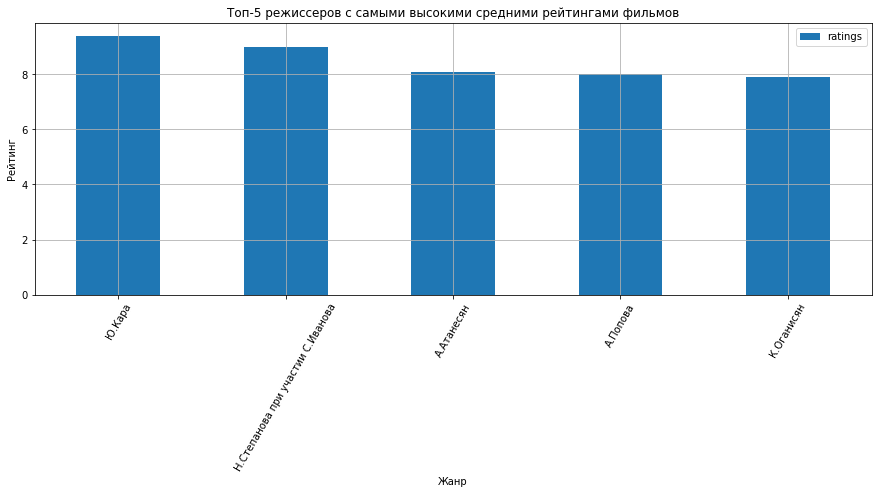

In [62]:
state_support[['base_director', 'ratings']].groupby('base_director').agg('mean').sort_values(by='ratings', ascending=False).head(5).plot(title='Топ-5 режиссеров с самыми высокими средними рейтингами фильмов', kind='bar',figsize=(15,5));
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.grid()
plt.xticks(rotation=60)
plt.show()

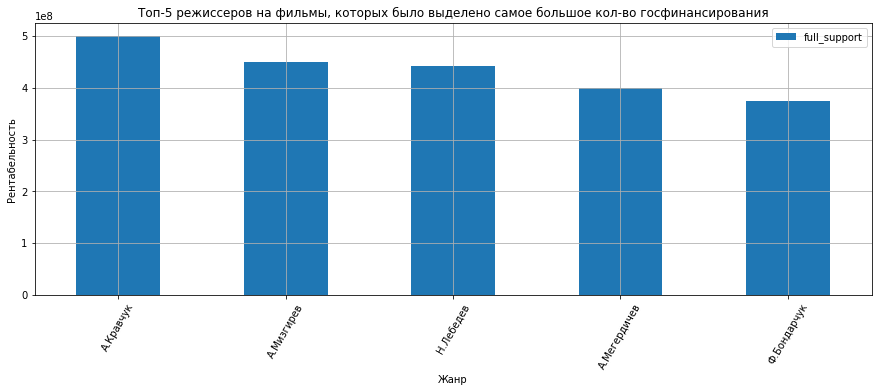

In [63]:
state_support.groupby('base_director').agg('mean').sort_values(by='full_support',ascending=False).head(5).plot(title='Топ-5 режиссеров на фильмы, которых было выделено самое большое кол-во госфинансирования',kind='bar',figsize=(15,5),stacked=True,
                  y='full_support')
plt.xlabel('Жанр')
plt.ylabel('Рентабельность')
plt.grid()
plt.xticks(rotation=60)
plt.show()

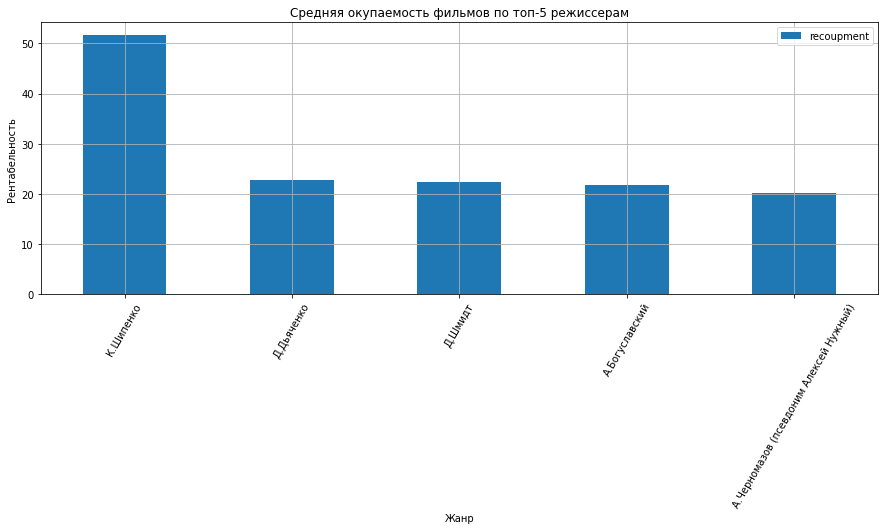

In [64]:
state_support.groupby('base_director').agg('sum').sort_values(by='recoupment',ascending=False).head(5).plot(title='Cредняя окупаемость фильмов по топ-5 режиссерам',kind='bar',figsize=(15,5),stacked=True,
                  y='recoupment')
plt.xlabel('Жанр')
plt.ylabel('Рентабельность')
plt.grid()
plt.xticks(rotation=60)
plt.show()

- Топ-5 режиссеров с самым высоким средним рейтингом: Ю.Кара, Н.Степанова при участии С.Иванова, А.Атанесян, А.Попова, К.Оганисян

- Топ-5 режиссеров на фильмы, которых было выделено самое большое кол-во госфинансирования:
Ф.Бондарчук, А.Кравчук, А.Мизгирев, Н.Лебедев, А.Мегердичев

- Топ-5 самых окупаемых режиссеров: К.Шипенко, Д.Дьяченко, Д.Шмидт, А.Богуславский, А.Чермомазов (псевд. Алексей Нужный)

#### Вывод

- В период за 2015 и 2016гг наблюдается отрицательная корреляция между такими параметрами как количество профинансированных фильмов и суммарное количество сборов, но с 2017 года показатели улучшились и уже можно заметить стабильную корреляию между этими двумя параметрами, из-за чего можно предположить, что улучшилось качество выбора фильмов для финансирования. 
- Такие жанры как: драма, комедия и мульфильмы - являются самыми финансированными, но при этом далеко не самые рейтинговые или окупаемые 
- Жанры биография и спорт - лучшие для финансирования, так как имеют хорошие рейтинги и окупаемость
- 5 самых рейтинговых, окупаемых и профинансированных режиссеров - это 15 разных человек. 

### Общий вывод

1. - Большинство пропусков в данных не заполняемы: нет взаимосвязи между director, producer и film_studio. Столбец 'box_office' скорее всего заполнен лишь теми фильмами, для которых уже посчитаны сборы, другие, вероятно, так и не вышли в прокат. Данные 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source' заполнены лишь для фильмов с господдержкой.

- Основная ошибка категоиальных данных - это пробелы в начале или в конце строки. В столбце production_country я выявила очевидные опечатки при просмотре уникальных значений (например, "К;анада"), также избавилась от разделителей-дефисов, заменяющих в некоторых строках запятые. Есть и повторы-опечатки: столбец 'puNumber'. Повторы в столбце 'title' из-за разных запусков одних и тех же фильмов.

- Ошибка количественных значений - это строки, в которых обозначенно оказание господдержки, но общий бюджет равен нулю. Заменены  медианными значениями доли общей суммы поддержки от общего бюджета фильма.

- Добавлены столбцы с информацией о годе проката. Также столбцы с именем и фамилией главного режиссёра и с основным жанром фильма. В столбцы вошли первые имена из списка режиссёров и первые основные жанры.

2.  - Для категории "0+" сумма сборов стабильно приближенна к нулю.
 - Можно предположить. что в независимости от того, сколько в кинотеатрах фильмов категории "0+" - на них придет, в общей сумме, примерно одно и то же количество людей.
 - Можно предположить, что на понижение общей сумму сборов по большей части влияют именно средние показатели, а не медианные. 
 - Категория "16+" за 4 года собрала больше всего денег в прокате. 
 - Люди ходят на ограниченное количество фильмов, резкая популярность фильмов одной категории может сильно повлиять на сборы соседней. Общая сумма сборов в год в среднем не изменяется.
 - к 2019 году сумма сборов сравнялись для категорий "6+", "12+" и "16+".
 - Фильмы с категорией "18+" имеет практически линейный рост - за 4 года на 50млн, с небольшим пиковым ростом в 2017 году. 
 
 3. - В период за 2015 и 2016гг наблюдается отрицательная корреляция между такими параметрами как количество профинансированных фильмов и суммарное количество сборов, но с 2017 года показатели улучшились и уже заметна стабильная корреляцию между этими двумя параметрами, из-за чего можно предположить, что улучшилось качество выбора фильмов для финансирования. 
- Такие жанры как: драма, комедия и мульфильмы - являются самыми финансированными, но при этом далеко не самые рейтинговые или окупаемые 
- Жанры биография и спорт - лучшие для финансирования, так как имеют хорошие рейтинги и окупаемость
- 5 самых рейтинговых, окупаемых и профинансированных режиссеров - это 15 разных человек. 